Importing Libraries

In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

Data Collection

In [ ]:
Mail_Data=pd.read_csv('../data/mail_data.csv')
Mail_Data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Data Preprocessing

In [458]:
Mail_Data.shape

(5572, 2)

In [459]:
Mail_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [460]:
Mail_Data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [461]:
Mail_Data.isnull().sum()

Category    0
Message     0
dtype: int64

In [462]:
Mail_Data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [463]:
Mail_Data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

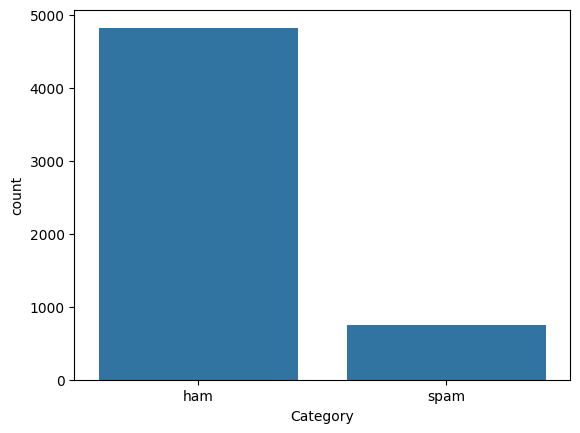

In [464]:
sns.countplot(x= Mail_Data['Category'])

In [465]:
Mail_Data.replace({'Category':{'ham':0,'spam':1}},inplace=True)

C:\Users\kisha\AppData\Local\Temp\ipykernel_23832\340422065.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Mail_Data.replace({'Category':{'ham':0,'spam':1}},inplace=True)


In [466]:
Mail_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [467]:
transformer=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X=transformer.fit_transform(Mail_Data['Message'])
Y=Mail_Data['Category']

In [468]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 43529 stored elements and shape (5572, 8440)>
  Coords	Values
  (0, 4244)	0.35097479377088364
  (0, 5775)	0.27451666535585145
  (0, 2278)	0.27180581777101714
  (0, 1281)	0.26251769953088055
  (0, 1715)	0.29650492406235857
  (0, 3551)	0.19387866945820545
  (0, 8281)	0.23740715800944148
  (0, 4370)	0.29650492406235857
  (0, 1713)	0.3350433781715565
  (0, 2003)	0.29650492406235857
  (0, 3511)	0.16453831818791093
  (0, 1061)	0.35097479377088364
  (0, 8079)	0.1961033223643189
  (1, 5373)	0.2718944069420321
  (1, 4406)	0.4083258549263009
  (1, 4212)	0.5236804332035243
  (1, 8187)	0.43162957585464123
  (1, 5399)	0.5466243141314314
  (2, 3276)	0.11676028650249681
  (2, 2885)	0.36440225960212075
  (2, 8239)	0.19287984407221892
  (2, 2119)	0.19686982823560253
  (2, 8199)	0.14953315491852773
  (2, 3014)	0.47550942852592687
  (2, 2337)	0.20418515380343544
  :	:
  (5567, 2777)	0.23210746089026935
  (5567, 307)	0.24294734175129457
  (5567

In [469]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


Train Test Split

In [470]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457, 8440)
(4457,)
(1115, 8440)
(1115,)


Model Building

In [471]:
Model=GradientBoostingClassifier()
Model.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [472]:
y_train_pred=Model.predict(x_train)
accscr=accuracy_score(y_train,y_train_pred)
print(accscr)

0.9759928202827014


In [473]:
y_pred=Model.predict(x_test)
accscr=accuracy_score(y_test,y_pred)
print(accscr)

0.957847533632287


Predective Mechanism

In [474]:
input1=transformer.transform(["New Theory: Argument wins d SITUATION, but loses the PERSON. So dont argue with ur friends just.. . . . kick them &amp; say, I'm always correct.!"])
input2=transformer.transform(["HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870 is a national rate call"])

pred1=Model.predict(input1)
pred2=Model.predict(input2)

print(pred1) #ham #0
print(pred2) #spam #1

[0]
[1]
